In [5]:
"""
scikit-learn基本功能：分类，回归， 聚类，数据降维， 数据预处理

-- 获取数据集的方式：
1. sklearn.datasets.load_*() 获取小规模数据集，数据集已经随scikit-learn安装而下载了
2. sklearn.datasets.fetch_*(data_home = None) 用于从远程获得大规模数据集， 函数第一个参数data_home表示数据集下载的目录

-- 数据集的方法和属性：
1. data：特征数据集(二维的numpy.ndarray数组)
2. target: 标签数组(一维的numpy.ndarray数组)
3. DESCR: 数据描述
4. feature_names: 特征名(新闻数据，手写数字，回归数据没有)
5. target_name: 标签名(回归数据没有)

-- 数据集划分：(可以使用sklearn.model_selection.train_test_split进行分割)
1. x: 数据集的特征值
2. y: 数据集的目标值
3. test_size: 测试数据的占比，用小数表示
返回值如下：
1. x_train: 训练部分的特征值
2. x_test: 测试部分的特征值
3. y_train: 训练部分的目标值
4. y_test: 测试部分的目标值

-- 本地数据集：
---- 分类数据集：
1. load_iris: 鸢尾花花瓣数据集
2. load_digits: 手写数字数据集
3. load_wine: 红酒数据集
4. load_breast_cancer: 乳腺癌数据集
---- 回归类数据集：
1. load_boston: 波士顿房价数据集
2. load_diabetes: 糖尿病数据集
3. load_linnerud: 体能训练数据集
-- 远程数据集：
---- 分类数据集：
1. fetch_olivetti_faces: 面孔数据集
2. fetch_20newsgroups: 20个新闻组数据集
3. fetch_lfw_people: 户外人脸识别数据集
4. fetch_lfw_pairs: 户外人脸对数据集(同一个人两个图片)
"""

'\nscikit-learn基本功能：分类，回归， 聚类，数据降维， 数据预处理\n\n- 获取数据集的方式：\n1.sklearn.datasets.load_*() 获取小规模数据集，数据集已经随scikit-learn安装而下载了\n2.sklearn.datasets.fetch_*(data_home = None) 用于从远程获得大规模数据集， 函数第一个参数data_home表示数据集下载的目录\n\n- 数据集的方法和属性：\n\n'

In [9]:
from sklearn import datasets
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
boston = datasets.load_boston()
print(type(boston))
print(dir(boston))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target']


In [12]:
# 永远都是 x 在前面，先训练后测试
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25)

# K近邻算法

In [ ]:
"""
它的原理是求两点之间的距离，看谁的距离最近，以此来区分要预测的数据是属于那个分类
使用sklearn实现K近邻算法:
sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
"""

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


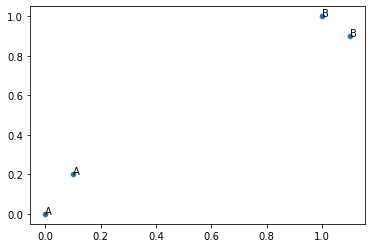

In [3]:
values = np.array([ [0, 0],
    [0.1, 0.2],
    [1, 1],
    [1.1, 0.9]] )
labels = ['A', 'A', 'B', 'B']
df = pd.DataFrame(values, labels)
axis = sns.scatterplot(values[:, 0], values[:, 1])
for value, label in zip(values, labels):
    axis.text(value[0], value[1], label)

In [4]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(values, labels)
knn.predict([[0.3, 0.3]])  # 要给出二维数组

array(['A'], dtype='<U1')

In [5]:
knn.predict([[1.3, 0.6]]) 

array(['B'], dtype='<U1')

In [13]:
"""
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/jiangyu/Desktop/datingTestSets', sep = '\t', names = ['flight', 'icecream', 'game', 'tppe'])
df.head()
features = df.drop(columns = ['type'], axis = 0)  # 去掉type这一列数据，把其他列数据返回给features变量
targets = df['type']
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_szie = 0.25)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)  # 0.812
knn.predict([[40000, 10, 0.5]])  # array(['largeDoses'], dtype = object)

# 标准化
scaler = StandarScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)  # 0.96
"""

"\nfrom sklearn.neighbors import KNeighborsClassifier\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\ndf = pd.read_csv('C:/Users/jiangyu/Desktop/datingTestSets', sep = '\t', names = ['flight', 'icecream', 'game', 'tppe'])\ndf.head()\nfeatures = df.drop(columns = ['type'], axis = 0)  # 去掉type这一列数据，把其他列数据返回给features变量\ntargets = df['type']\nX_train, X_test, y_train, y_test = train_test_split(features, targets, test_szie = 0.25)\nknn = KNeighborsClassifier()\nknn.fit(X_train, y_train)\nknn.score(X_test, y_test)  # 0.812\nknn.predict([[40000, 10, 0.5]])  # array(['largeDoses'], dtype = object)\n\n# 标准化\nscaler = StandarScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)\nknn.fit(X_train, y_train)\nknn.score(X_test, y_test)  # 0.96\n"

#### K近邻算法练习

In [18]:
# 导入相关库
import pandas as pd
from sklearn.model_selection import train_test_split  # 训练集和测试集划分工具
from sklearn.preprocessing import StandardScaler  # 标准化工具
from sklearn.neighbors import KNeighborsClassifier  # K近邻算法库
from sklearn.datasets import load_wine  # 导入红酒数据集

In [19]:
# 加载数据
wine = load_wine()

In [21]:
# 标准化
scaler = StandardScaler()
features = scaler.fit_transform(wine.data)
targets = wine.target

In [29]:
# x训练数据集求得分
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.25)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

In [30]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 朴素贝叶斯

In [1]:
# 联合概率：指多个条件同时满足的概率  
# 条件概率：指 A 事件满足情况下，B 事件发生的概率
# 朴素贝叶斯公式：P(A|B) = [P(B|A) * P(A)] / P(B)
# P(A|B) ：某个关键词属于某个分类的概率
# P(B|A) ：某个分类下，某个关键词出现的概率
# P(A) ：某个类别的概率
# P(B) ：这个关键词在需要预测的文档中出现的概率

In [2]:
import pandas as pd
dat1 = {'科技类':{'明星': 9, '影院': 8, '云计算':63, '支付宝': 20, '汇总': 100},
        '娱乐类':{'明星': 51, '影院': 56, '云计算':0, '支付宝': 15, '汇总': 121},
        '汇总':{'明星': 60, '影院': 64, '云计算':63, '支付宝': 35, '汇总': 221}}
a = pd.DataFrame(dat1)
a

,科技类,娱乐类,汇总
明星,9,51,60
影院,8,56,64
云计算,63,0,63
支付宝,20,15,35
汇总,100,121,221


In [3]:
# 现在有一篇文章包含 影院，支付宝，云计算 试分析该文章属于哪个类别的概率大一些
# P(科技|影视，支付宝，云计算) = P(影视，支付宝，云计算|科技) * P(科技) = (8 / 100) * (20 / 100) * (63 / 100) * (100 / 121)
# P(娱乐|影视，支付宝，云计算) = P(影视，支付宝，云计算|娱乐) * P(娱乐) = (56 / 121) * (35 / 121) * (63 / 121) * (121 / 221)
# 拉普拉斯平滑系数 ：为避免出现概率为 0 的情况，其值默认为 1

In [31]:
# 项目实战：文章分类
from sklearn.feature_extraction.text import CountVectorizer  # 文本提取库
from sklearn.datasets import fetch_20newsgroups  # 远程数据集
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [27]:
world1 = 'Life is short, I use Python'
world2 = 'I love Python, it makes me happy'
vect = CountVectorizer()
words = vect.fit_transform([world1, world2])
names = vect.get_feature_names()
print(names)
print(words.toarray())
print(type(words))

['happy', 'is', 'it', 'life', 'love', 'makes', 'me', 'python', 'short', 'use']
[[0 1 0 1 0 0 0 1 1 1]
 [1 0 1 0 1 1 1 1 0 0]]
<class 'scipy.sparse.csr.csr_matrix'>


In [33]:
newsgroups = fetch_20newsgroups()
# newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size = 0.25)
news_vect = CountVectorizer()
X_train = news_vect.fit_transform(X_train)  # 提取特征,然后再矩阵化
X_test = news_vect.transform(X_test)  # 只矩阵化
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8289148108872393

In [ ]:
# 朴素贝叶斯算法
# 1. 多项式模型，应用于离散性数据，比如：文档分类，垃圾邮件识别等。使用的类是：sklearn.navie_bayes.MultinomialNB
# 2. 高斯模型，应用于连续性数据采用。使用的类是：sklearn.navie_bayes.GaussianNB
# 3. 伯努利模型，应用于特征值都是 0 和 1 的情况下。使用的类是：sklearn.navie_bayes.BernoulliNB

# 决策树

In [2]:
"""
信息熵 H(x) = -1 * np.sum(pi * np.ldg(pi)) (比特)
信息熵越大，数据越分散，有点类似方差
信息增益：表示特征 x 使得类 y 的不确定性减少的程度
决策树算法：ID3、C4.5、CART
预剪枝：决策树建立过程进行修剪可以降低过拟合
后剪枝：决策树建立之后再进行修剪

Sklearn实现决策树:可以通过sklearn.tree.DecisionTreeClassifier来实现决策树
1. criterion: gini(基尼系数) 或则 entroy(信息熵)
2. splitter: best 或则 random
3. max_depth: 树的最大深度
4. min_samples_split: 决策树中某个叶子节点的样本最小个数
5. min_weight_fraction_leaf: 叶子节点所有样本权重和的最小值
6. max_leaf_nodes: 最大的叶子节点个数
7. class_weight: 指定样本各特征的权重
8. min_impurity_decrease: 最小的不纯度
"""

'\n信息熵 H(x) = -1 * np.sum(pi * np.ldg(pi)) (比特)\n信息熵越大，数据越分散，有点类似方差\n信息增益：表示特征 x 使得类 y 的不确定性减少的程度\n决策树算法：ID3、C4.5、CART\n预剪枝：决策树建立过程进行修剪可以降低过拟合\n后剪枝：决策树建立之后再进行修剪\n\nSklearn实现决策树:可以通过sklearn.tree.DecisionTreeClassifier来实现决策树\n1. criterion: gini(基尼系数) 或则 entroy(信息熵)\n2. splitter: best 或则 random\n3. max_depth: 树的最大深度\n4. min_samples_split: 决策树中某个叶子节点的样本最小个数\n5. min_weight_fraction_leaf: 叶子节点所有样本权重和的最小值\n6. max_leaf_nodes: 最大的叶子节点个数\n7. class_weight: 指定样本各特征的权重\n8. min_impurity_decrease: 最小的不纯度\n'